In [1]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

Задание 1

In [2]:
df = pd.read_csv('C:/Davis.csv')
df

,Unnamed: 0,sex,weight,height,repwt,repht
0,1,M,77,182,77.0,180.0
1,2,F,58,161,51.0,159.0
2,3,F,53,161,54.0,158.0
3,4,M,68,177,70.0,175.0
4,5,F,59,157,59.0,155.0
...,...,...,...,...,...,...
195,196,M,74,175,71.0,175.0
196,197,M,83,180,80.0,180.0
197,198,M,81,175,NaN,NaN
198,199,M,90,181,91.0,178.0


a) Разделите датасет на 2 выборки (train, test) из 100 человек, с сохранением пропорции полов

In [3]:
from sklearn.model_selection import train_test_split
df_x = df.drop("sex",axis='columns')
df_y = df.sex
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y,
                                                    test_size=0.5,random_state=25, 
                                                    stratify = df_y)

б) Очистите выборки от выбросов - людей с нереалистичным ростом/весом

*Если надо именно так - хорошо...*

In [4]:
def drop_incorrect(df):
    df = df.loc[df['weight'] > 40]
    df = df.loc[df['weight'] < 110] #На 120 есть небольшой выброс, он всё портит(
    df = df.loc[df['height'] > 140]
    df = df.loc[df['height'] < 200]
    
    df = df.dropna(axis='index', how='any')
    df = df.reset_index(drop=True)
    return df

In [5]:
def modify_split(x,y):
    df_temp = pd.concat([x,y],axis=1)
    df_temp = drop_incorrect(df_temp)
    return x,y

X_train,y_train = modify_split(X_train,y_train)
X_test, y_test = modify_split(X_test, y_test)

*...но, вообще, нормальные люди сначала обрабатывают датасет, а потом разделяют данные перед обучением*

In [6]:
df = drop_incorrect(df)

In [7]:
df_x = df.drop("sex",axis='columns')
df_y = df.sex
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y,train_size=0.5,
                                                    test_size=0.5,random_state=25, 
                                                    stratify = df_y)

в) Отобразите train-выборку на в виде точек на графике

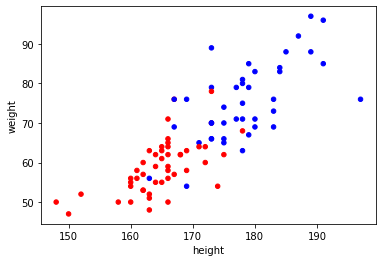

In [8]:
colors = np.where(y_train == 'M', 'blue', 'red')
X_train.plot(x='height', y='weight', kind='scatter',c=colors)

г) Постройте гистограммы:

* Роста и веса (в целом, только женщины, только мужчины)  
В целом:

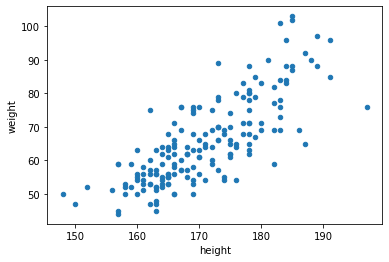

In [9]:
df.plot(x='height', y='weight', kind='scatter')

Только женщины:

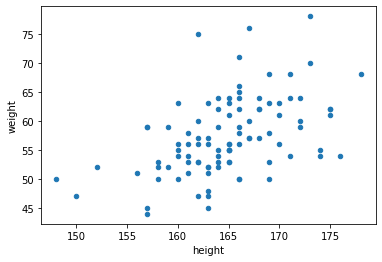

In [10]:
df1 = df.loc[df['sex'] == 'F']
df1.plot(x='height', y='weight', kind='scatter')

Только мужчины:

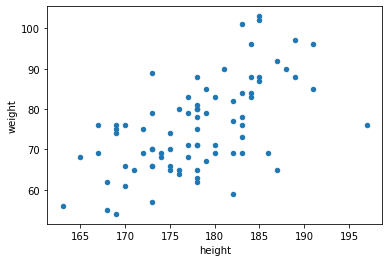

In [11]:
df1 = df.loc[df['sex'] == 'M']
df1.plot(x='height', y='weight', kind='scatter')

* Величины (repwt - weight) (в целом, только женщины, только мужчины)  
В целом:

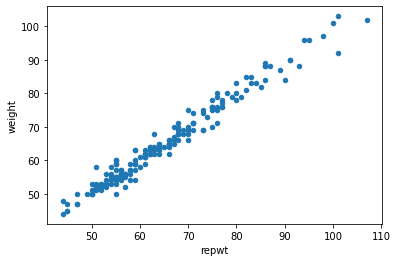

In [12]:
df.plot(x='repwt', y='weight', kind='scatter')

Только женщины:

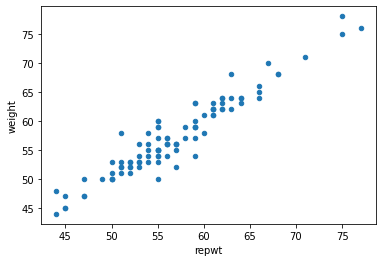

In [13]:
df1 = df.loc[df['sex'] == 'F']
df1.plot(x='repwt', y='weight', kind='scatter')

Только мужчины:

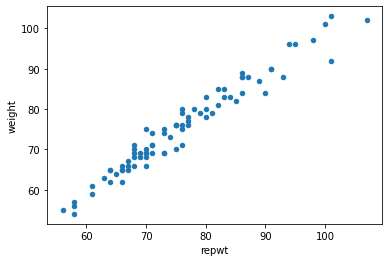

In [14]:
df1 = df.loc[df['sex'] == 'M']
df1.plot(x='repwt', y='weight', kind='scatter')

* Величины (repht - height) (в целом, только женщины, только мужчины)  
В целом:

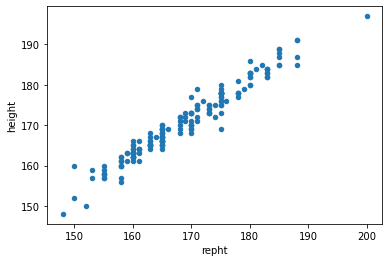

In [15]:
df.plot(x='repht', y='height', kind='scatter')

Только женщины:

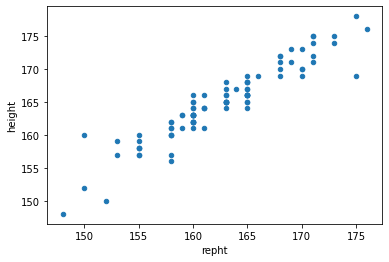

In [16]:
df1 = df.loc[df['sex'] == 'F']
df1.plot(x='repht', y='height', kind='scatter')

Только мужчины:

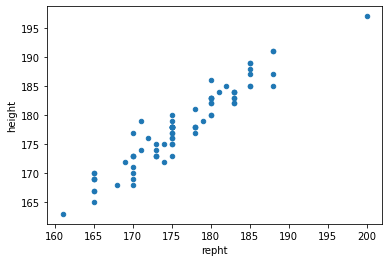

In [17]:
df1 = df.loc[df['sex'] == 'M']
df1.plot(x='repht', y='height', kind='scatter')

**д) Постройте генератор данных**

In [18]:
def generate_points(data,s):
    if s=='M':
        df1 = df.loc[df['sex'] == 'M']
    elif s=='F':
        df1 = df.loc[df['sex'] == 'F']
        
    prob = len(df1)/len(df) 
    hm = df1.height - np.mean(df1.height)
    wm = df1.weight - np.mean(df1.weight)
    
    cov_h = np.var(hm)
    cov_w = np.var(wm)
    cov_wh = np.mean(hm*wm)
    
    mean = [np.mean(df1.height), np.mean(df1.weight)]
    cov = [[cov_h, cov_wh], [cov_wh, cov_w]]
    x, y = np.random.multivariate_normal(mean, cov, 100).T
    plt.plot(x,y,'o')
    plt.plot(df1.height,df1.weight,'*')
    plt.show()

    mtrx = np.array([x,y]).T
    pravd = multivariate_normal.pdf(mtrx, mean=mean, cov=cov) * prob

    return pravd

Отобразим сгенерированные выборки отдельно по мужчинам и женщинам, сравнивая с исходными данными

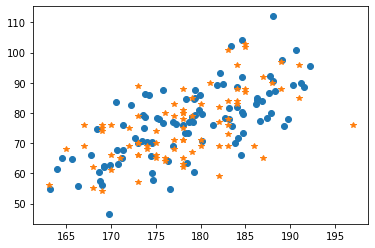

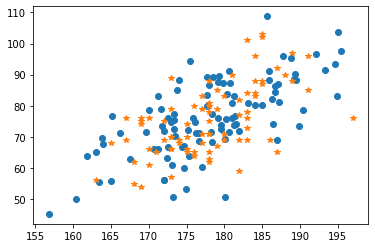

(array([0.00044676, 0.00118527, 0.00081593, 0.00024637, 0.00017348]),
 array([1.96955260e-05, 8.60527933e-05, 4.36766310e-04, 9.30532432e-04,
        5.13993890e-05]))

In [19]:
result1 = generate_points(X_train,'M')
result2 = generate_points(X_test,'M')
result1[:5],result2[:5]

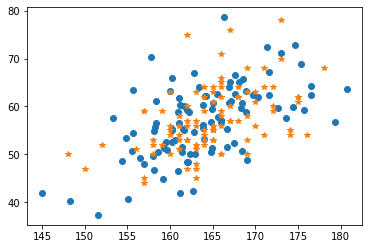

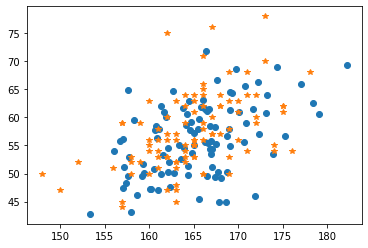

(array([0.00125273, 0.00107304, 0.00028161, 0.00027647, 0.00039835]),
 array([0.00176806, 0.00130346, 0.00141999, 0.00084826, 0.00034753]))

In [20]:
result1 = generate_points(X_train,'F')
result2 = generate_points(X_test,'F')
result1[:5],result2[:5]

**Задание 2**

In [21]:
w_x = df.weight.values.reshape(-1,1)
h_x = df.height.values.reshape(-1,1)

In [22]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()  
regressor.fit(h_x, w_x)
print(regressor.intercept_)
print(regressor.coef_)

[-124.46844348]
[[1.11276092]]


In [23]:
w0 = regressor.coef_[0]
w1 = regressor.intercept_

y_ = w0*df.height + w1

In [24]:
df11 = pd.DataFrame(data={'from df': df.weight, 'linear': y_, 'difference':y_ - df.weight})
df11.head(5)

,from df,linear,difference
0,77,78.054044,1.054044
1,58,54.686064,-3.313936
2,53,54.686064,1.686064
3,68,72.490239,4.490239
4,59,50.235021,-8.764979


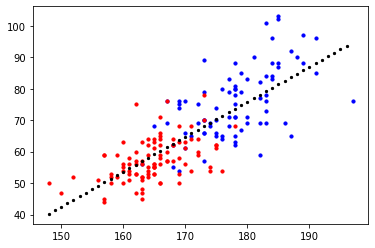

In [25]:
import matplotlib.pyplot as plt
def print_plot():
    plt.plot()
    plt.scatter(df.height[df.sex=='M'], df.weight[df.sex=='M'], color='blue', marker='o', s=10)
    plt.scatter(df.height[df.sex=='F'], df.weight[df.sex=='F'], color='red', marker='o', s=10)

    xt = np.arange(min(df.height), max(df.height), 1)
    yt =  w0*xt + w1

    plt.scatter(xt, yt, color='black', s=5)
    plt.show()
print_plot()

In [26]:
w = 1
b = 0
w_graph = []
b_graph = []

def gradient(x,y):
    w = 1
    b = 0
    alpha = 0.0001

    N = len(x)

    #w_graph = []
    #b_graph = []
    w_graph.clear()
    b_graph.clear()

    max_norm = 5
    for t in range(10000):
        l = (1/N * np.sum((y - w * x - b)**2))
        d_yh = (w * x + b - y)

        d_w = np.mean(d_yh * x)
        d_b = np.mean(d_yh)

        norm = np.sqrt(d_w**2 + d_b**2)

  
        if t % 500 == 0: #Специально урезано чтобы не забивало файл
            print("w,b = ",w,b)
            print("L = ", l)
            print("d_w, d_b", d_w, d_b)
            print("------------------")
        
        if norm > max_norm:
            reciprocal = norm / max_norm
            d_w /= reciprocal
            d_b /= reciprocal
        w = w - alpha * d_w
        b = b - alpha * d_b

        w_graph.append(w)
        b_graph.append(b)
    return w,b

In [27]:
def graph_diff(w,b):
    w0 = w
    w1 = b

    plt.plot()
    plt.scatter(df.height[df.sex=='M'], df.weight[df.sex=='M'], color='blue', marker='o', s=10)
    plt.scatter(df.height[df.sex=='F'], df.weight[df.sex=='F'], color='red', marker='o', s=10)
    xt = np.arange(min(df.height), max(df.height), 1)
    yt = w0*xt + w1
    plt.scatter(xt, yt, color='green', s=5)

    w0 = regressor.coef_[0]
    w1 = regressor.intercept_


    xt = np.arange(min(df.height), max(df.height), 1)
    yt = w0*xt + w1
    plt.scatter(xt, yt, color='black', s=5)

    plt.show()

In [28]:
w,b = gradient(df.height,df.weight)

w,b =  1 0
L =  11133.241573033707
d_w, d_b 17961.494382022473 105.20786516853933
------------------
w,b =  0.750004296360667 -0.001465660615007087
L =  3980.847876068408
d_w, d_b 10647.588825700868 62.504886173934025
------------------
w,b =  0.5000086360055188 -0.002938678797189977
L =  485.46928426431225
d_w, d_b 3333.6832789248365 19.801907215089283
------------------
w,b =  0.38586837931600043 -0.01014889561610833
L =  105.58569466235242
d_w, d_b -6.735607593369353 0.2985151758652227
------------------
w,b =  0.38591862165528606 -0.02171292578279968
L =  105.57812285389141
d_w, d_b -7.241002046649293 0.2955329888650562
------------------
w,b =  0.38598401219102274 -0.03325898208824362
L =  105.57035186834159
d_w, d_b -7.300164043442616 0.29515622384353046
------------------
w,b =  0.3860511783902479 -0.04480365256048722
L =  105.56255662056334
d_w, d_b -7.30714207264931 0.2950841439400548
------------------
w,b =  0.3861185485957836 -0.05634723792327103
L =  105.55475975696903
d_w

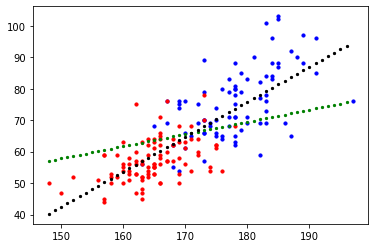

In [29]:
graph_diff(w,b)

Отобразим поведение величин w и b со временем:

0.3869941543758231

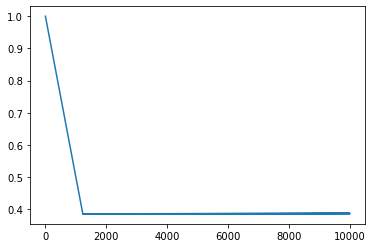

In [30]:
x = np.linspace(0, len(w_graph),len(w_graph))
y = w_graph
plt.plot(x, y)
w

-0.206316405863641

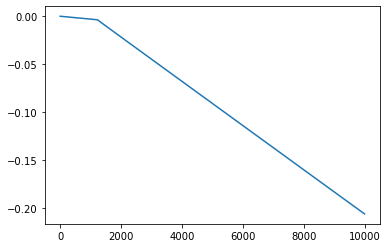

In [31]:
x = np.linspace(0, len(b_graph),len(b_graph))
y = b_graph
plt.plot(x, y)
b

И, соответственно, нормализуя:

In [32]:
weight_norm = (df.weight - df.weight.mean()) / df.weight.std()
height_norm = (df.height - df.height.mean()) / df.height.std()

w,b = gradient(height_norm,weight_norm)
w = w * df.weight.std() / df.height.std()
b = df.weight.mean() + b * df.weight.std() - w * df.height.mean()

w,b =  1 0
L =  0.4387023961779703
d_w, d_b 0.21935119808898534 -1.6503652377293058e-15
------------------
w,b =  0.9893001068201506 8.202308994306644e-17
L =  0.4341221719257773
d_w, d_b 0.20871141666857349 -1.5879931576941846e-15
------------------
w,b =  0.979119219351906 1.5876582196243951e-16
L =  0.4299755051965279
d_w, d_b 0.19858772519734166 -1.5075331744488784e-15
------------------
w,b =  0.9694321628646249 2.3059481914456583e-16
L =  0.42622135605083167
d_w, d_b 0.18895509037571917 -1.3983820343874163e-15
------------------
w,b =  0.9602149837453708 2.991733577477422e-16
L =  0.42282256933167733
d_w, d_b 0.17978969316162954 -1.3291490255484318e-15
------------------
w,b =  0.951444890267756 3.633061392301749e-16
L =  0.41974550693645
d_w, d_b 0.1710688698720912 -1.2524313671052328e-15
------------------
w,b =  0.9431001962338231 4.232232541951134e-16
L =  0.416959714897554
d_w, d_b 0.16277105614171972 -1.1520123182486877e-15
------------------
w,b =  0.9351602673496373 4.808

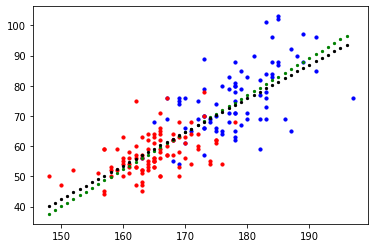

In [33]:
graph_diff(w,b)

Ещё немного графиков (процесса):

1.2292665176968847

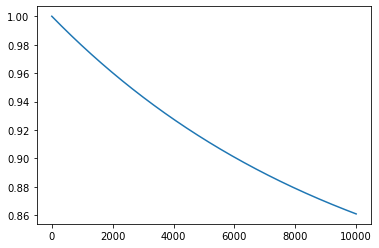

In [34]:
x = np.linspace(0, len(w_graph),len(w_graph))
y = w_graph
plt.plot(x, y)
w

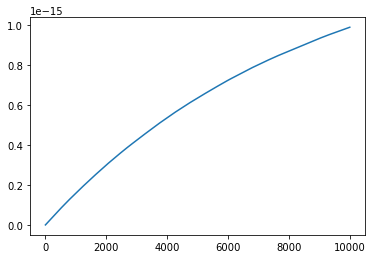

In [35]:
x = np.linspace(0, len(b_graph),len(b_graph))
y = b_graph
plt.plot(x, y)

Часть 2

In [36]:
w1 = 1
w2 = 1
b = 0
alpha = 0.0001

In [37]:
y = weight_norm
x1 = height_norm
N = len(x1)

Дальше надо привести к бинарному виду столбец с полами.  
Учитывая, что у нас ключевой "М", то примем его равным 1. 

In [38]:
x2 = df.sex
x2 = pd.get_dummies(x2)
x2 = x2.M

In [39]:
w1_graph = []
w2_graph = []
b_graph = []

max_norm = 5
for t in range(10000):
    l = (1/N * np.sum((y - w1 * x1 - w2 * x2 - b)**2))
    d_yh = (w1 * x1 + w2 * x2 + b - y)
    
    d_w1 = np.mean(d_yh * x1)
    d_w2 = np.mean(d_yh * x2)
    d_b = np.mean(d_yh)
    
    norm = np.sqrt(d_w1**2 + d_w2**2 + d_b**2)

        
    if t % 500 == 0:
        print("w1,w2,b = ",w1,w2,b)
        print("L = ", l)
        print("d_w, d_b", d_w1, d_w2, d_b)
        print("------------------")

    if norm > max_norm:
        reciprocal = norm / max_norm
        d_w1 /= reciprocal
        d_w2 /= reciprocal
        d_b /= reciprocal
    w1 = w1 - alpha * d_w1
    w2 = w2 - alpha * d_w2
    b = b - alpha * d_b
    
    w1_graph.append(w1)
    w2_graph.append(w2)
    b_graph.append(b)

w1,w2,b =  1 1 0
L =  0.9226941151516602
d_w, d_b 0.5848952290917332 0.4695239493744854 0.45505617977527907
------------------
w1,w2,b =  0.9716749207367211 0.9772977109779389 -0.02193807029659751
L =  0.8507120751190073
d_w, d_b 0.5484305932451232 0.43885601434676963 0.42278729256414854
------------------
w1,w2,b =  0.9451151282064317 0.9560776325557646 -0.04231903180064411
L =  0.7878483319451264
d_w, d_b 0.5142631400277838 0.41021643041914596 0.3927500032387753
------------------
w1,w2,b =  0.920209455906355 0.9362417355404987 -0.06125061897546078
L =  0.732944617001286
d_w, d_b 0.4822464934814946 0.38347092731670473 0.3647919685457757
------------------
w1,w2,b =  0.8968538186351451 0.9176984799280092 -0.07883320934393723
L =  0.6849900934082368
d_w, d_b 0.45224369125112523 0.3584941240587002 0.33877115511768335
------------------
w1,w2,b =  0.8749507571978798 0.9003623852904198 -0.09516032148000006
L =  0.6431025613171563
d_w, d_b 0.4241265748051412 0.33516894041621775 0.314555145

In [40]:
print(w1,w2,b)

0.6704316652874479 0.7415712647278945 -0.23666260170214373


И для сравнения, так же натренируем модель через LinearRegression()  

In [41]:
df11 = pd.DataFrame(data={'weight': weight_norm, 'height': height_norm, 'sexM': x2})
w_x1 = df11.weight.values.reshape(-1,1)
w_x2 = df11.sexM.values.reshape(-1,1)
w_y = df11.height.values.reshape(-1,1)

x = np.column_stack((w_x1,w_x2))

In [42]:
regressor = LinearRegression()  
regressor.fit(x,w_y)
print(regressor.intercept_)
print(regressor.coef_)

[-0.33721953]
[[0.51777449 0.74105032]]
